**Nombre: German Mauricio Otálvaro Quiroga**

In [44]:
#Librerias de sklearn
from   sklearn.naive_bayes import GaussianNB
from   sklearn.feature_selection import SelectKBest
import sklearn.model_selection as ms
#Librerias básicas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas  as pd
import numpy   as np
#Se establece el tamaño de los graficos
sns.set( rc = {'figure.figsize':(16,9)} )

In [45]:
#Load del dataset  verificación de Billetes
info  =  pd.read_csv('data_banknote_authentication.txt', delimiter=',', decimal='.', header=None, names=['Variance','Skewness','Curtosis','Entropy','Class']);
data = pd.DataFrame(info);

In [46]:
#Se muestran las primeras 10 filas del dataset
print(data.head(10));

   Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661  -2.80730 -0.44699      0
1   4.54590    8.1674  -2.45860 -1.46210      0
2   3.86600   -2.6383   1.92420  0.10645      0
3   3.45660    9.5228  -4.01120 -3.59440      0
4   0.32924   -4.4552   4.57180 -0.98880      0
5   4.36840    9.6718  -3.96060 -3.16250      0
6   3.59120    3.0129   0.72888  0.56421      0
7   2.09220   -6.8100   8.46360 -0.60216      0
8   3.20320    5.7588  -0.75345 -0.61251      0
9   1.53560    9.1772  -2.27180 -0.73535      0


**1. Describa el dataset.**

**CREADOR**:

Owner of database: Volker Lohweg (University of Applied Sciences, Ostwestfalen-Lippe, volker.lohweg '@' hs-owl.de) 

Donor of database: Helene DÃrksen (University of Applied Sciences, Ostwestfalen-Lippe, helene.doerksen '@' hs-owl.de) 

**INFO**:

Los datos se extrajeron de imágenes que se tomaron de especímenes genuinos y falsificados de billetes similares. Para la digitalización, se usó una cámara industrial generalmente utilizada para la inspección de impresión. Las imágenes finales tienen 400x 400 píxeles. Debido a la lente del objeto y la distancia al objeto investigado, se obtuvieron imágenes en escala de grises con una resolución de aproximadamente 660 ppp. Se usó la herramienta Transformación Wavelet para extraer características de las imágenes.


**ATRIBUTOS**:

1. Variance: varianza de la imagen transformada Wavelet (continua).
2. Skewness: sesgo de la imagen transformada Wavelet (continua.
3. Curtosis: curtosis de la imagen transformada Wavelet (continua). 
4. Entropy:  entropía de la imagen (continua).
5. Class:    clase (entero).

In [24]:
#Visualizamos la cantidad de muestras por la clase 
print(data.groupby('Class').size())

Class
0    762
1    610
dtype: int64


In [47]:
#2. Calcule, para las variables numéricas, las medidas de tendencia central (media, moda, mediana) y la desviación estándar.

print('\n\nMEDIA, MODA, MEDIANA, DESVIACIÓN ESTANDAR: \n');

print("\nVarianza de la imagen transformada Wavelet\n");
print("Media: "   + str(  data.Variance.mean()   ) );
try:
    print('Moda: ', mode( data.Variance ));
except StatisticsError:
    print('Moda: ','No hay una unica moda encontrada');
print("Mediana: " + str(  data.Variance.median() ) );
print("Desviación estándar: " + str(  data.Variance.std() ) );


print("\nSesgo de la imagen transformada Wavelet\n");
print("Media: "   + str(  data.Skewness.mean()   ) );
try:
    print('Moda: ', mode( data.Skewness ));
except StatisticsError:
    print('Moda: ','No hay una unica moda encontrada');
print("Mediana: " + str(  data.Skewness.median() ) );
print("Desviación estándar: " + str(  data.Skewness.std() ) );


print("\nCurtosis de la imagen transformada Wavelet\n");
print("Media: "   + str(  data.Curtosis.mean()   ) );
try:
    print('Moda: ', mode( data.Curtosis ));
except StatisticsError:
    print('Moda: ','No hay una unica moda encontrada');
print("Mediana: " + str(  data.Curtosis.median() ) );
print("Desviación estándar: " + str(  data.Curtosis.std() ) );

print("\nEntropía de la imagen\n");
print("Media: "   + str(  data.Entropy.mean()   ) );
try:
    print('Moda: ', mode( data.Entropy ));
except StatisticsError:
    print('Moda: ','No hay una unica moda encontrada');
print("Mediana: " + str(  data.Entropy.median() ) );
print("Desviación estándar: " + str(  data.Entropy.std() ) );


print("\nClase\n");
print("Media: "   + str(  data.Class.mean()   ) );
try:
    print('Moda: ', mode( data.Class ));
except StatisticsError:
    print('Moda: ','No hay una unica moda encontrada');
print("Mediana: " + str(  data.Class.median() ) );
print("Desviación estándar: " + str(  data.Class.std() ) );




MEDIA, MODA, MEDIANA, DESVIACIÓN ESTANDAR: 


Varianza de la imagen transformada Wavelet

Media: 0.4337352570699707
Moda:  0.5706
Mediana: 0.49618
Desviación estándar: 2.842762586278562

Sesgo de la imagen transformada Wavelet

Media: 1.9223531206393603
Moda:  -4.4552
Mediana: 2.31965
Desviación estándar: 5.869046743695522

Curtosis de la imagen transformada Wavelet

Media: 1.3976271172667651
Moda:  No hay una unica moda encontrada
Mediana: 0.61663
Desviación estándar: 4.310030090106595

Entropía de la imagen

Media: -1.191656520043731
Moda:  No hay una unica moda encontrada
Mediana: -0.58665
Desviación estándar: 2.1010131373596095

Clase

Media: 0.4446064139941691
Moda:  0
Mediana: 0.0
Desviación estándar: 0.4971032701256577


Variables correlacionadas - Diagrama de dispersión: 



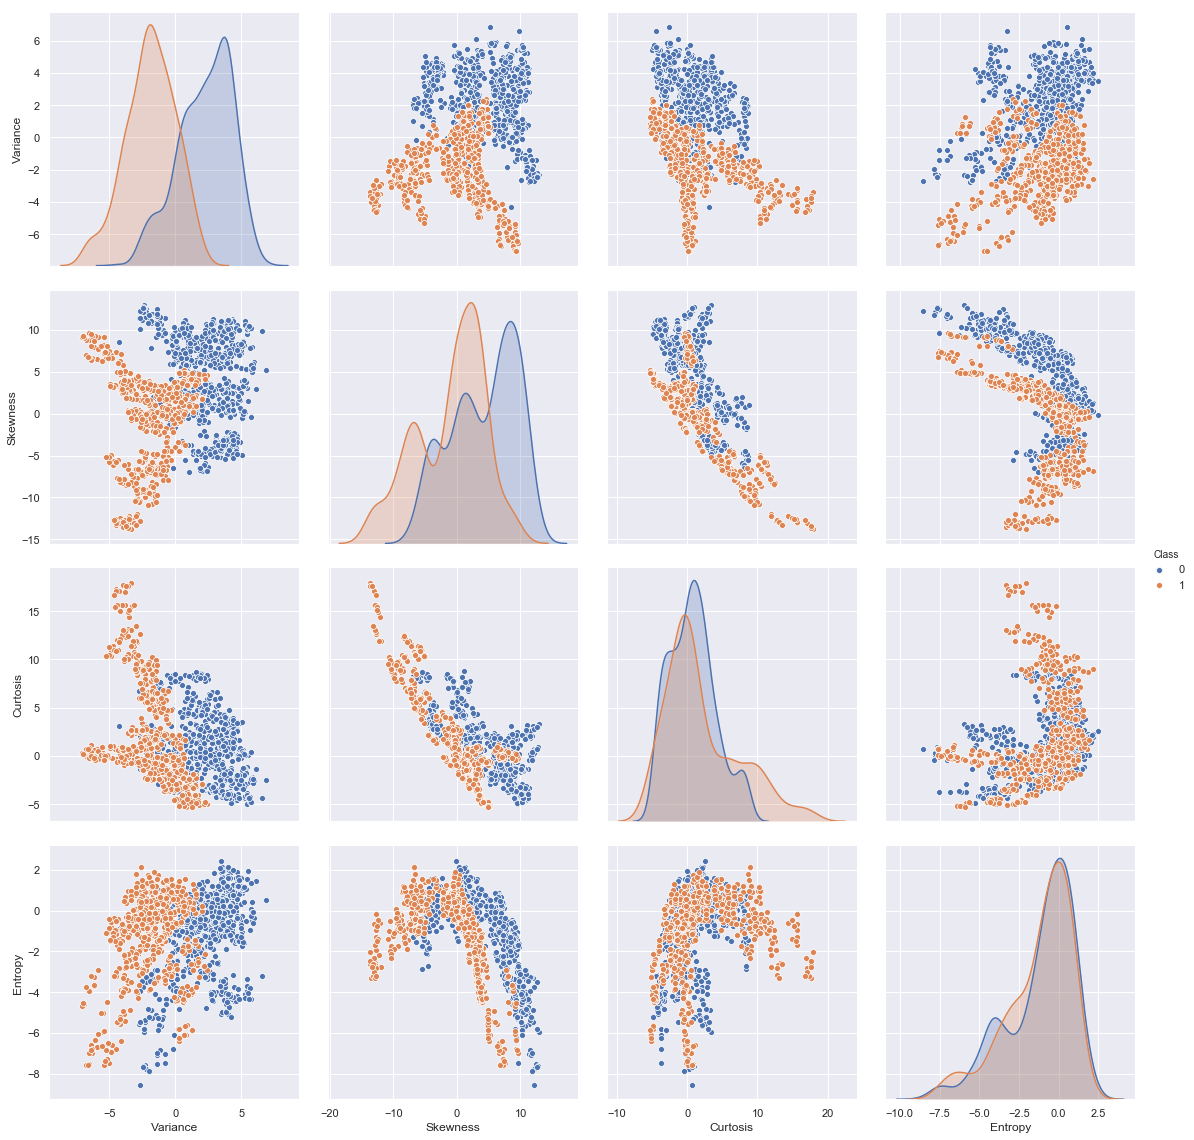

In [54]:
#3. Identifique variables correlacionadas gracias a un diagrama de dispersión.
print('Variables correlacionadas - Diagrama de dispersión: \n');
sns.pairplot( data.dropna(), hue='Class', height=4,vars=["Variance","Skewness","Curtosis", "Entropy"], kind='scatter')

In [65]:
#info completa del dataset
X_Original = data.iloc[:,0:4]
#Columna Objetivo 
Y_Original = data.iloc[:,4]

#identificamos las mejores columnas para realizar el entrenamiento
mejorSeleccion = SelectKBest(k=4)
#Se entrena
X_new = mejorSeleccion.fit_transform(X_Original, Y_Original)
X_new.shape
#Obtenemos los indices de las columnas mas adecuadas para realizar el entrenamiento
seleccionado = mejorSeleccion.get_support(indices=True)
print('Seleccion de mejores datos:\n')
print(X_Original.columns[seleccionado])
print('\n')

#Se construye el nuevo conjunto de datos
X_Nueva = data.iloc[:, seleccionado ]

Seleccion de mejores datos:

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy'], dtype='object')




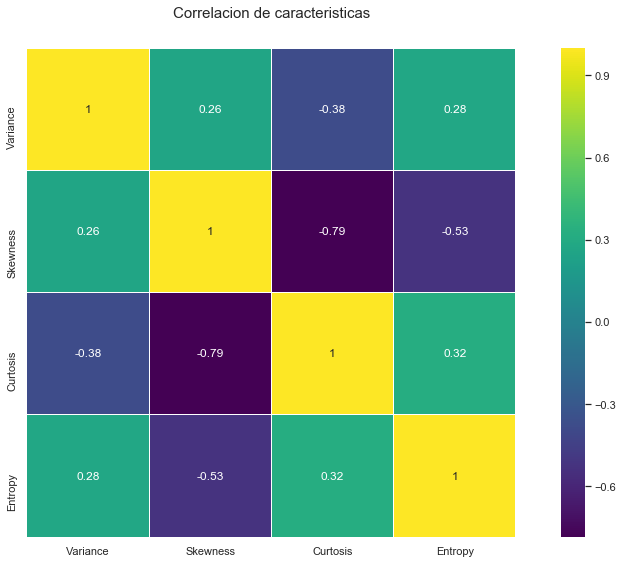

In [67]:
colormap = plt.cm.viridis
plt.title('Correlacion de caracteristicas', y=1.05, size=15)
sns.heatmap( X_Nueva.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

**4. Entrene un modelo de Naive Bayes variando la proporción existente entre los datos de entrenamiento y los datos de prueba.**

In [85]:
#Entrenamos el primer modelo con un porcentaje de 20% de verificación
X_train1, X_test1, Y_train1, Y_test1 = ms.train_test_split(X_Nueva, Y_Original, test_size = 0.2);

#Creamos y entrenamos el modelo con los datos seleccionados
gnb1 = GaussianNB();
gnb1.fit(X_train1, Y_train1);

In [86]:
#Entrenamos el primer modelo con un porcentaje de 30% de verificación
X_train2, X_test2, Y_train2, Y_test2 = ms.train_test_split(X_Nueva, Y_Original, test_size = 0.3);

#Creamos y entrenamos el modelo con los datos seleccionados
gnb2 = GaussianNB();
gnb2.fit(X_train2, Y_train2);

**5. Evalúe la efectividad de cada uno de los modelos.**

In [93]:
#Se valida la clase objetivo en comparacion de la clase predicha y se muestran las 10 primeras filas
y_pred = gnb1.predict(X_test1)
comp1  = pd.DataFrame({'Y-OBJETIVO': Y_test1, 'Y-PRONOSTICADA': y_pred })
print('Comparación clase objetivo y clase predicha del primer modelo con 20% de prueba\n')
print(comp1.head(10))

#Se valida la clase objetivo en comparacion de la clase predicha y se muestran las 10 primeras filas
y_pred2 = gnb2.predict(X_test2)
comp2   = pd.DataFrame({'Y-OBJETIVO': Y_test2, 'Y-PRONOSTICADA': y_pred2 })
print('\nComparación clase objetivo y clase predicha del segundo modelo con 30% de prueba\n')
print(comp2.head(10))


#SE CALCULA LA EFECTIVIDAD DE CADA MODELO 
modelEfec1 = gnb1.score(X_test1, Y_test1);
modelEfec2 = gnb2.score(X_test2, Y_test2);


print("\nEfectividad con 10% de verificación: " + str( modelEfec1 ) );
print("Efectividad con 20% de verificación: "   + str( modelEfec2 ) );

Comparación clase objetivo y clase predicha del primer modelo con 20% de prueba

      Y-OBJETIVO  Y-PRONOSTICADA
1145           1               1
316            0               0
64             0               0
761            0               0
1237           1               1
1329           1               1
702            0               0
367            0               0
88             0               0
508            0               0

Comparación clase objetivo y clase predicha del segundo modelo con 30% de prueba

      Y-OBJETIVO  Y-PRONOSTICADA
1044           1               1
398            0               0
321            0               0
1088           1               0
1126           1               1
471            0               0
1160           1               1
318            0               1
528            0               0
403            0               0

Efectividad con 10% de verificación: 0.8
Efectividad con 20% de verificación: 0.8349514563106796


**6. Construya una gráfica que relaciona la cantidad de datos usados para el entrenamiento con la efectividad obtenida para el modelo y describa sus hallazgos.**

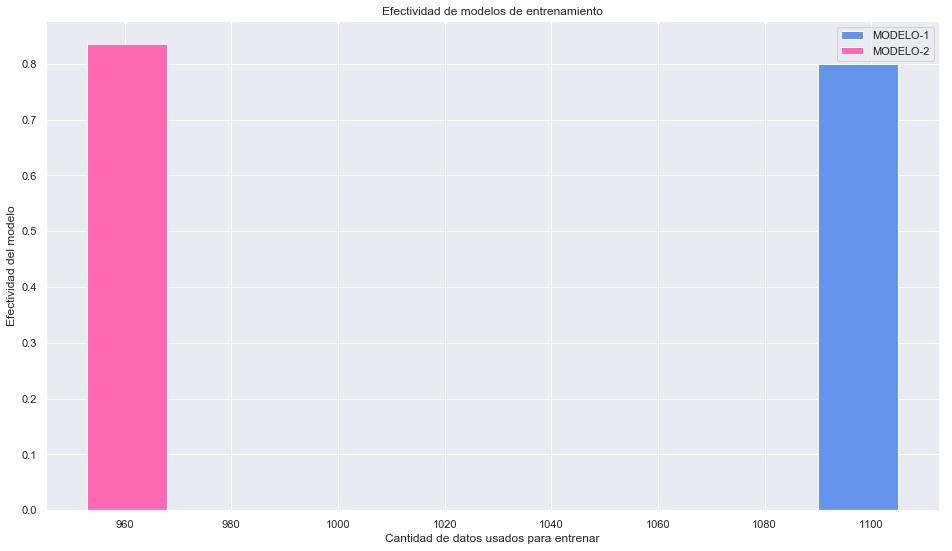

In [94]:
#SE CALCULA LA CANTIDAD DE DATOS USADOS PARA EL PRIMER MODELO
cantidadDatos1erModelo = len(X.index) - (len(X.index)*20)/100;
#SE CALCULA LA CANTIDAD DE DATOS USADOS PARA EL SEGUNDO MODELO
cantidadDatos2doModelo = len(X.index) - (len(X.index)*30)/100;

print('\n');

plt.bar(cantidadDatos1erModelo, modelEfec1, facecolor='#6495ED', edgecolor='white',width=15, label='MODELO-1' );
plt.bar(cantidadDatos2doModelo, modelEfec2, facecolor='#ff69b4', edgecolor='white', width=15, label='MODELO-2');

plt.title('Efectividad de modelos de entrenamiento');
plt.xlabel('Cantidad de datos usados para entrenar');
plt.ylabel('Efectividad del modelo');
plt.legend(loc='best')
plt.show();

**Al ejecutar el conjunto de datos con el modelo clasificador de Naive Bayes se obtubo un buen rendimineto con el uso de un 80% de datos de entrenamiento y  20% de prueba, asi mismo el haber analizado el conjunto de datos mediante graficas de dispersion y de la libreria de SelectKBest se garantizo que los resultados obtenidos fueran los mejores posibles.**